In [61]:
import pandas as pd

try:
    df = pd.read_excel("Employee Data Main.xlsx")
    display(df.head())
except FileNotFoundError:
    print("Error: 'Employee Data Main.xlsx' not found. Please ensure the file exists in the current directory or provide the correct path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,NaN,5.0,5.0
1,Pooja Kaur,Senior Analyst,Banglore,2-3,Y,798703.0,NaN,5.0,5.0
2,Kajal Mehta,Analyst,Banglore,1-2,Y,663851.0,NaN,5.0,5.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,NaN,4.0,4.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,NaN,4.0,4.0


In [62]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name                            0
Role                            0
Location                        0
Years of Experience             8
Active?                         0
Current Comp (INR)              0
Last Working Day              263
L3Q Average Self Rating         0
L3Q Average Manager Rating      0
dtype: int64


In [63]:
# 1. Shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Data types of each column
print("\nData Types:\n", df.dtypes)

# 3. Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Pay particular attention to 'Years of Experience' and 'Current Comp (INR)'
print("\nYears of Experience Statistics:\n", df['Years of Experience'].describe())
print("\nCurrent Comp (INR) Statistics:\n", df['Current Comp (INR)'].describe())


# 4. Explore categorical columns
print("\nUnique Roles and their frequencies:\n", df['Role'].value_counts())
print("\nUnique Locations and their frequencies:\n", df['Location'].value_counts())
print("\nActive Employee Distribution:\n", df['Active?'].value_counts())

Shape of the DataFrame: (300, 9)

Data Types:
 Name                           object
Role                           object
Location                       object
Years of Experience            object
Active?                        object
Current Comp (INR)            float64
Last Working Day               object
L3Q Average Self Rating       float64
L3Q Average Manager Rating    float64
dtype: object

Descriptive Statistics:
        Current Comp (INR)  L3Q Average Self Rating  L3Q Average Manager Rating
count        3.000000e+02               300.000000                  300.000000
mean         8.841135e+05                 4.451667                    4.298333
std          4.691850e+05                 0.497651                    0.625675
min          5.700000e+05                 4.000000                    2.000000
25%          5.700000e+05                 4.000000                    4.000000
50%          6.993650e+05                 4.000000                    4.000000
75%          8.949

In [64]:
# Calculate the total number of missing values in each column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentages = (missing_counts / len(df)) * 100

# Report the findings for columns with missing values
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print("Missing Values Summary:\n", missing_summary)

# Additional context for columns with significant missing values
for col in missing_summary.index:
    if missing_percentages[col] > 0:
        print(f"\nColumn '{col}': {missing_percentages[col]:.2f}% missing ({missing_counts[col]} out of {len(df)} entries).")

Missing Values Summary:
                      Missing Count  Missing Percentage
Years of Experience              8            2.666667
Last Working Day               263           87.666667

Column 'Years of Experience': 2.67% missing (8 out of 300 entries).

Column 'Last Working Day': 87.67% missing (263 out of 300 entries).


In [65]:
# Fill missing 'Years of Experience' using forward fill (less suitable for this data)
df['Years of Experience'].fillna(method='ffill', inplace=True)

# Display the first few rows to check the changes
print("DataFrame after handling NaN with forward fill:")
display(df.head())

# Verify that there are no more missing values in 'Years of Experience'
print("\nMissing Values after handling NaN with forward fill:")
print(df['Years of Experience'].isnull().sum())

DataFrame after handling NaN with forward fill:


<ipython-input-65-e41dcd65343e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(method='ffill', inplace=True)
<ipython-input-65-e41dcd65343e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Years of Experience'].fillna(method='ffill', inplace=True)


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,NaN,5.0,5.0
1,Pooja Kaur,Senior Analyst,Banglore,2-3,Y,798703.0,NaN,5.0,5.0
2,Kajal Mehta,Analyst,Banglore,1-2,Y,663851.0,NaN,5.0,5.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,NaN,4.0,4.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,NaN,4.0,4.0



Missing Values after handling NaN with forward fill:
0


In [66]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name                            0
Role                            0
Location                        0
Years of Experience             0
Active?                         0
Current Comp (INR)              0
Last Working Day              263
L3Q Average Self Rating         0
L3Q Average Manager Rating      0
dtype: int64


In [67]:
# Fill missing values in 'Last Working Day' with the string 'Na'
df['Last Working Day'].fillna('Na', inplace=True)

# Display the first few rows to check the changes
print("DataFrame after filling 'Last Working Day' with 'Na':")
display(df.head())

# Verify that there are no more missing values in 'Last Working Day'
print("\nMissing Values in 'Last Working Day' after filling with 'Na':")
print(df['Last Working Day'].isnull().sum())

DataFrame after filling 'Last Working Day' with 'Na':


<ipython-input-67-eb64ff170405>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Working Day'].fillna('Na', inplace=True)


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,Na,5.0,5.0
1,Pooja Kaur,Senior Analyst,Banglore,2-3,Y,798703.0,Na,5.0,5.0
2,Kajal Mehta,Analyst,Banglore,1-2,Y,663851.0,Na,5.0,5.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,Na,4.0,4.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,Na,4.0,4.0



Missing Values in 'Last Working Day' after filling with 'Na':
0


In [68]:
# Identify duplicate rows
duplicate_rows = df.duplicated()

# Print the boolean series indicating duplicates
print("Boolean series indicating duplicate rows:")
print(duplicate_rows)

# Display the actual duplicate rows (optional)
print("\nActual duplicate rows:")
print(df[duplicate_rows])

Boolean series indicating duplicate rows:
0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

Actual duplicate rows:
Empty DataFrame
Columns: [Name, Role, Location, Years of Experience, Active?, Current Comp (INR), Last Working Day, L3Q Average Self Rating, L3Q Average Manager Rating]
Index: []


In [69]:
# Normalize Categories

# Check for inconsistencies in 'Role' column
print("Original unique values in 'Role':")
print(df['Role'].unique())

# Example normalization: Correcting "Senir Associate" to "Senior Associate"
df['Role'] = df['Role'].replace('Senir Associate', 'Senior Associate')

# You can add more replacements as needed based on your analysis of the unique values
# df['Role'] = df['Role'].replace('Another Mistake', 'Correct Value')

print("\nUnique values in 'Role' after normalization:")
print(df['Role'].unique())

# Check for inconsistencies in 'Location' column (less likely to need extensive cleaning based on initial analysis, but good practice)
print("\nOriginal unique values in 'Location':")
print(df['Location'].unique())

# Example: Correcting a typo like "Banglore" to "Bangalore" if present
df['Location'] = df['Location'].replace('Banglore', 'Bangalore')

print("\nUnique values in 'Location' after normalization:")
print(df['Location'].unique())

# Check for inconsistencies in 'Active?' column (seems fine from initial analysis, but demonstrate the process)
print("\nOriginal unique values in 'Active?':")
print(df['Active?'].unique())

# No normalization needed for 'Active?' based on previous output, but if there were variations like 'y', 'n', 'Yes', 'No', you would normalize them.
# Example if needed:
# df['Active?'] = df['Active?'].replace({'y': 'Y', 'n': 'N', 'Yes': 'Y', 'No': 'N'})

print("\nUnique values in 'Active?' after normalization:")
print(df['Active?'].unique())

print("\nDataFrame head after normalizing categories:")
display(df.head())

Original unique values in 'Role':
['Analyst' 'Senior Analyst' 'Associate' 'Senior Associate'
 'Senir Associate' 'Manager']

Unique values in 'Role' after normalization:
['Analyst' 'Senior Analyst' 'Associate' 'Senior Associate' 'Manager']

Original unique values in 'Location':
['Jaipur' 'Banglore' 'Pune']

Unique values in 'Location' after normalization:
['Jaipur' 'Bangalore' 'Pune']

Original unique values in 'Active?':
['Y' 'N']

Unique values in 'Active?' after normalization:
['Y' 'N']

DataFrame head after normalizing categories:


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,Na,5.0,5.0
1,Pooja Kaur,Senior Analyst,Bangalore,2-3,Y,798703.0,Na,5.0,5.0
2,Kajal Mehta,Analyst,Bangalore,1-2,Y,663851.0,Na,5.0,5.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,Na,4.0,4.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,Na,4.0,4.0


In [70]:
# prompt: write a code to identify any negative values in numeric coloums

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number'])

# Identify columns with negative values
negative_value_cols = {}
for col in numeric_cols.columns:
    negative_values = df[df[col] < 0][col]
    if not negative_values.empty:
        negative_value_cols[col] = negative_values.tolist()

if negative_value_cols:
    print("\nColumns with negative values:")
    for col, values in negative_value_cols.items():
        print(f"- '{col}': Found negative values. Example values: {values[:5]} (displaying up to 5 examples)")
else:
    print("\nNo negative values found in numerical columns.")


No negative values found in numerical columns.


In [71]:
# To analyze the highest turnover rate by location, we first need to define what constitutes "turnover".
# Based on the data, we can infer that employees are considered to have turned over if their
# 'Active?' status is 'N' (No) and they have a value other than 'Na' in the 'Last Working Day' column.
# This assumes 'Na' in 'Last Working Day' means the employee is still active or was active when the data was collected.

# 1. Filter for employees who have turned over
# We need to make sure 'Active?' column is consistent in casing. Assuming 'Y' and 'N'.
df['Active?'] = df['Active?'].str.upper() # Ensure consistent casing

# Filter for employees who are not active ('N') and have a recorded 'Last Working Day' (not NaT after conversion)
# We also need to make sure the 'Last Working Day' column has been converted to datetime previously.
# If not, run the code from the previous step to convert it.
turnover_df = df[(df['Active?'] == 'N') & (df['Last Working Day'].notna())]

# 2. Count total employees and turnover employees by Location
# Count total employees per location
total_employees_by_location = df['Location'].value_counts().rename('Total Employees')

# Count turnover employees per location
turnover_employees_by_location = turnover_df['Location'].value_counts().rename('Turnover Employees')

# 3. Combine the counts into a single DataFrame
turnover_summary = pd.concat([total_employees_by_location, turnover_employees_by_location], axis=1)

# Fill NaN values with 0 for locations with no turnover
turnover_summary['Turnover Employees'].fillna(0, inplace=True)

# Ensure 'Turnover Employees' is integer type for calculating rate
turnover_summary['Turnover Employees'] = turnover_summary['Turnover Employees'].astype(int)

# 4. Calculate the Turnover Rate by Location
turnover_summary['Turnover Rate (%)'] = (turnover_summary['Turnover Employees'] / turnover_summary['Total Employees']) * 100

# 5. Sort by Turnover Rate in descending order to find the highest
turnover_summary_sorted = turnover_summary.sort_values(by='Turnover Rate (%)', ascending=False)

# Display the results
print("Turnover Rate by Location:")
print(turnover_summary_sorted)

# Identify the location(s) with the highest turnover rate
if not turnover_summary_sorted.empty:
    highest_rate_value = turnover_summary_sorted.iloc[0]['Turnover Rate (%)']
    locations_with_highest_rate = turnover_summary_sorted[turnover_summary_sorted['Turnover Rate (%)'] == highest_rate_value]

    print(f"\nLocation(s) with the highest turnover rate ({highest_rate_value:.2f}%):")
    # Print the summary for the location(s) with the highest rate
    print(locations_with_highest_rate)
else:
    print("\nCould not calculate turnover rate by location. Ensure there are employees marked as 'N' and with a 'Last Working Day'.")

Turnover Rate by Location:
           Total Employees  Turnover Employees  Turnover Rate (%)
Location                                                         
Bangalore              150                  25          16.666667
Pune                    45                   7          15.555556
Jaipur                 105                   3           2.857143

Location(s) with the highest turnover rate (16.67%):
           Total Employees  Turnover Employees  Turnover Rate (%)
Location                                                         
Bangalore              150                  25          16.666667


<ipython-input-71-98413f027c40>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  turnover_summary['Turnover Employees'].fillna(0, inplace=True)


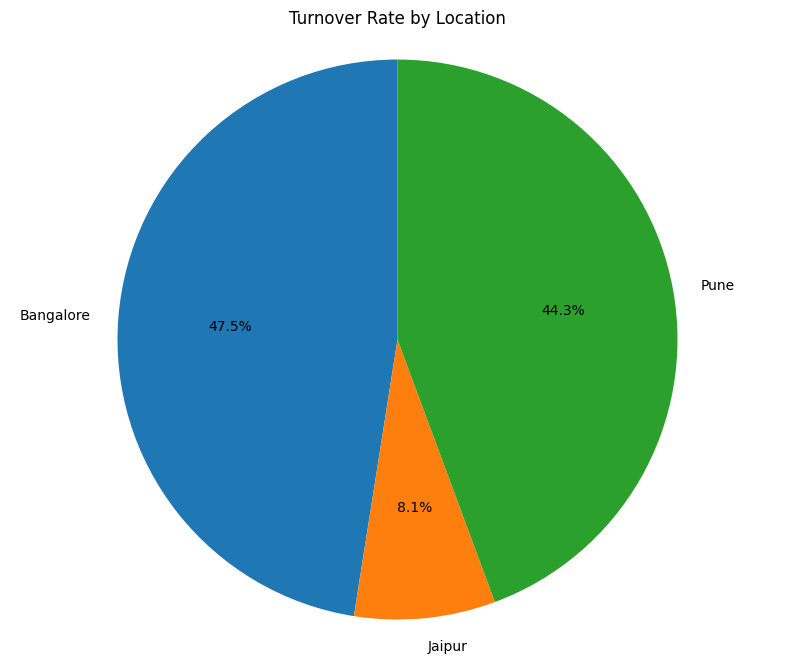

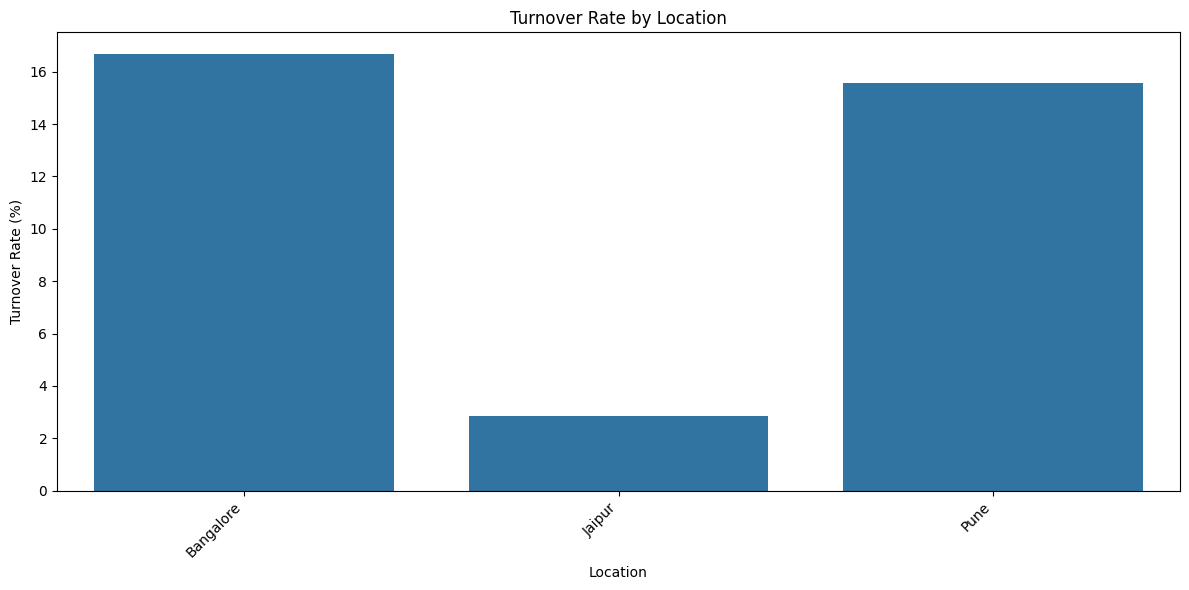

In [72]:
# prompt: show turn over rates in pie bar graph

# To show turnover rates by location in a pie chart
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure turnover_summary is available from the previous steps
# If not, re-run the previous code block to generate it.

if 'turnover_summary' in locals() and not turnover_summary.empty:
    # Create a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(turnover_summary['Turnover Rate (%)'], labels=turnover_summary.index, autopct='%1.1f%%', startangle=90)
    plt.title('Turnover Rate by Location')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=turnover_summary.index, y=turnover_summary['Turnover Rate (%)'])
    plt.title('Turnover Rate by Location')
    plt.xlabel('Location')
    plt.ylabel('Turnover Rate (%)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many locations
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

else:
    print("Turnover summary not available. Please run the previous code block to calculate turnover rates.")


In [73]:
import pandas as pd

try:
    df_industry_comp = pd.read_excel("Average Industry Compensation.xlsx")
    print("Industry Compensation Data:")
    display(df_industry_comp.head())
    print(f"Shape of df_industry_comp: {df_industry_comp.shape}")

    df_employee_data = pd.read_excel("Employee Data Main.xlsx")
    print("\nEmployee Data:")
    display(df_employee_data.head())
    print(f"Shape of df_employee_data: {df_employee_data.shape}")
except FileNotFoundError:
    print("Error: One or both of the Excel files were not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Industry Compensation Data:


,Location,Role,Average Industry Compensation
0,Jaipur,Manager,2337356.25
1,Jaipur,Senior Associate,1558237.50
2,Jaipur,Associate,1038825.00
3,Jaipur,Senior Analyst,769500.00
4,Jaipur,Analyst,570000.00


Shape of df_industry_comp: (15, 3)

Employee Data:


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,NaN,5.0,5.0
1,Pooja Kaur,Senior Analyst,Banglore,2-3,Y,798703.0,NaN,5.0,5.0
2,Kajal Mehta,Analyst,Banglore,1-2,Y,663851.0,NaN,5.0,5.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,NaN,4.0,4.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,NaN,4.0,4.0


Shape of df_employee_data: (300, 9)



Columns in df_employee_data: Index(['Name', 'Role', 'Location', 'Years of Experience', 'Active?',
       'Current Comp (INR)', 'Last Working Day', 'L3Q Average Self Rating',
       'L3Q Average Manager Rating'],
      dtype='object')
Columns in df_industry_comp: Index(['Location', 'Role', 'Average Industry Compensation'], dtype='object')

Merged DataFrame Head:


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating,Average Industry Compensation
0,Aditi Khanna,Analyst,Jaipur,1-2,Y,653874.0,NaN,5.0,5.0,570000.0
1,Pooja Kaur,Senior Analyst,Banglore,2-3,Y,798703.0,NaN,5.0,5.0,891000.0
2,Kajal Mehta,Analyst,Banglore,1-2,Y,663851.0,NaN,5.0,5.0,660000.0
3,Amaya Joshi,Analyst,Jaipur,0-1,Y,570000.0,NaN,4.0,4.0,570000.0
4,Bilal Kulkarni,Associate,Jaipur,3-4,Y,976125.0,NaN,4.0,4.0,1038825.0



Rows where no industry compensation data was found (NaN in 'Average Industry Compensation'):
                Role Location  Current Comp (INR)
18   Senir Associate   Jaipur         1714061.250
51   Senir Associate   Jaipur         1324501.875
59   Senir Associate   Jaipur         1869885.000
210  Senir Associate   Jaipur         1324501.875
226  Senir Associate   Jaipur         1542655.125
245  Senir Associate   Jaipur         1714061.250
251  Senir Associate   Jaipur         1402413.750
291  Senir Associate   Jaipur         1402413.750

DataFrame with Compensation Comparison:


,Role,Location,Current Comp (INR),Average Industry Compensation,Compensation Difference (INR),Compensation Ratio (vs Industry),Compensation Competitiveness
0,Analyst,Jaipur,653874.0,570000.0,83874.0,1.147147,Above Industry Average
1,Senior Analyst,Banglore,798703.0,891000.0,-92297.0,0.896412,Below Industry Average
2,Analyst,Banglore,663851.0,660000.0,3851.0,1.005835,Competitive with Industry
3,Analyst,Jaipur,570000.0,570000.0,0.0,1.000000,Competitive with Industry
4,Associate,Jaipur,976125.0,1038825.0,-62700.0,0.939643,Below Industry Average



Summary of Compensation Competitiveness:
Compensation Competitiveness
Below Industry Average       106
Competitive with Industry    101
Above Industry Average        85
No Industry Data               8
Name: count, dtype: int64

Compensation Competitiveness by Location:


Compensation Competitiveness,Above Industry Average,Below Industry Average,Competitive with Industry,No Industry Data
Location,,,,
Banglore,18.666667,50.000000,31.333333,0.000000
Jaipur,41.904762,8.571429,41.904762,7.619048
Pune,28.888889,48.888889,22.222222,0.000000



Compensation Competitiveness by Role:


Compensation Competitiveness,Above Industry Average,Below Industry Average,Competitive with Industry,No Industry Data
Role,,,,
Analyst,28.476821,33.112583,38.410596,0.0
Associate,26.086957,47.826087,26.086957,0.0
Manager,83.333333,0.000000,16.666667,0.0
Senior Analyst,20.000000,45.333333,34.666667,0.0
Senior Associate,71.428571,0.000000,28.571429,0.0
Senir Associate,0.000000,0.000000,0.000000,100.0


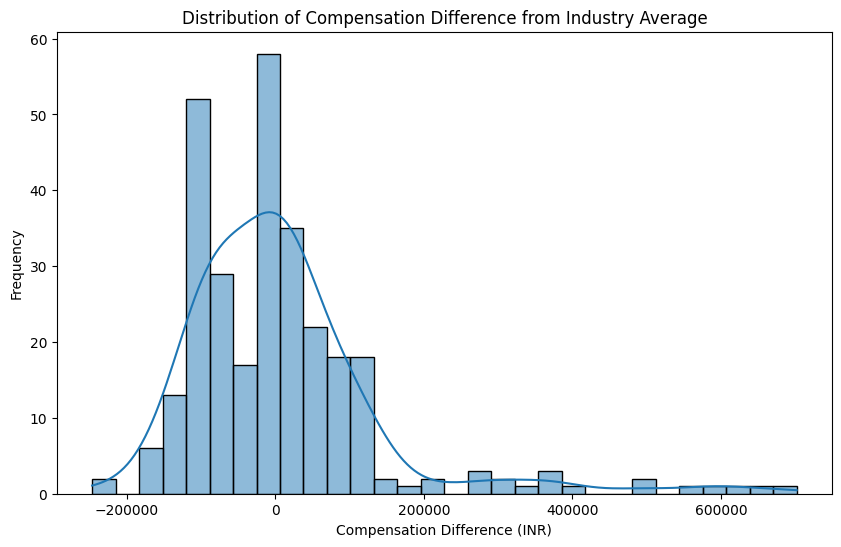

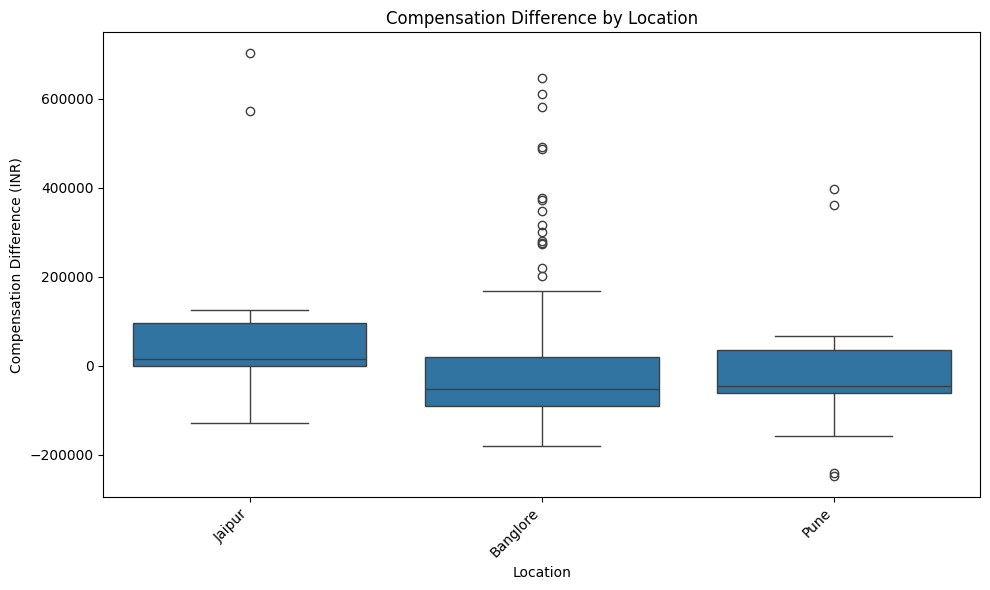

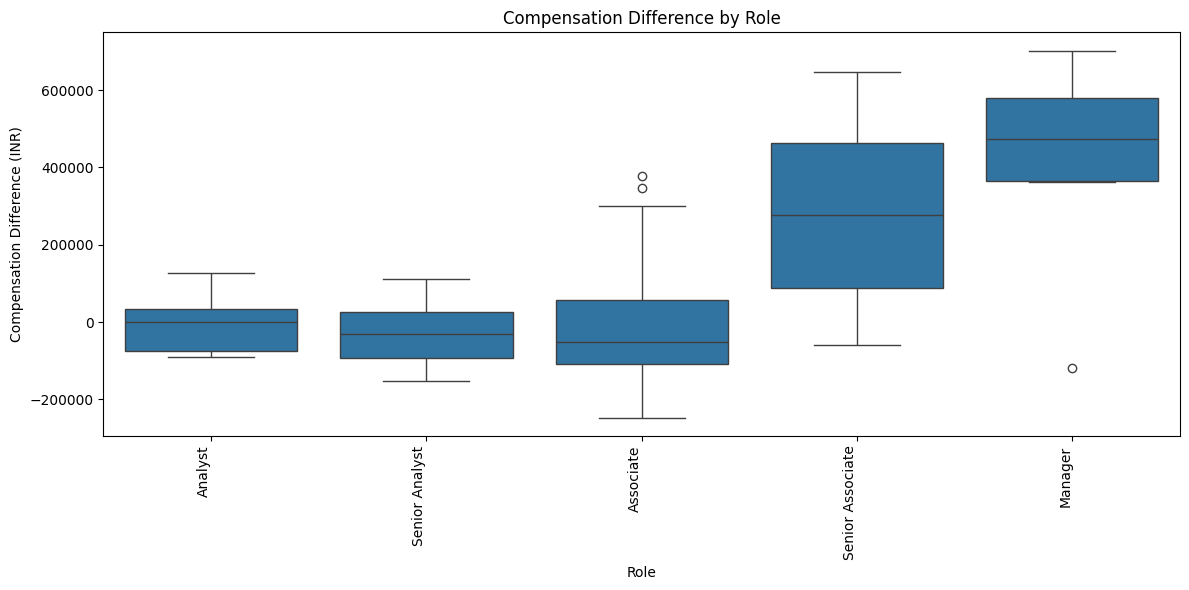

In [74]:
# prompt: Compare Average Industry Compensation coloum from Average Industry Compensation dataset to Current Comp (INR) from Employee Data Main and identify how competitive their  compensation is from industry standard include location and role for comparision using left merge

# Perform a left merge on 'Role' and 'Location'
# We'll use 'Role' and 'Location' as the key columns for the merge.
# Employee Data Main has 'Role', 'Location', and 'Current Comp (INR)'.
# Average Industry Compensation has 'Role', 'Location', and 'Average Industry Compensation'.
# We'll merge the industry compensation data onto the employee data.

# Before merging, let's ensure the column names match exactly in both dataframes for the merge keys.
# Check the column names in both dataframes
print("\nColumns in df_employee_data:", df_employee_data.columns)
print("Columns in df_industry_comp:", df_industry_comp.columns)

# Assuming the key columns are indeed 'Role' and 'Location' in both dataframes
# Perform the left merge
merged_df = pd.merge(
    df_employee_data,
    df_industry_comp[['Role', 'Location', 'Average Industry Compensation']], # Select only the needed columns from the industry data
    on=['Role', 'Location'],
    how='left'
)

print("\nMerged DataFrame Head:")
display(merged_df.head())

# Check for rows where a match was not found (i.e., Average Industry Compensation is NaN)
print("\nRows where no industry compensation data was found (NaN in 'Average Industry Compensation'):")
print(merged_df[merged_df['Average Industry Compensation'].isnull()][['Role', 'Location', 'Current Comp (INR)']])

# Now, compare the employee's Current Comp (INR) with the Average Industry Compensation
# We can create a new column to show the difference or ratio
merged_df['Compensation Difference (INR)'] = merged_df['Current Comp (INR)'] - merged_df['Average Industry Compensation']
merged_df['Compensation Ratio (vs Industry)'] = merged_df['Current Comp (INR)'] / merged_df['Average Industry Compensation']

# To analyze competitiveness, we can categorize employees based on the difference or ratio
# For example, create a category column
def categorize_compensation(row):
    if pd.isna(row['Average Industry Compensation']):
        return 'No Industry Data'
    difference = row['Compensation Difference (INR)']
    if difference > 0.05 * row['Average Industry Compensation']: # More than 5% above industry average
        return 'Above Industry Average'
    elif difference < -0.05 * row['Average Industry Compensation']: # More than 5% below industry average
        return 'Below Industry Average'
    else: # Within +/- 5% of industry average
        return 'Competitive with Industry'

merged_df['Compensation Competitiveness'] = merged_df.apply(categorize_compensation, axis=1)

print("\nDataFrame with Compensation Comparison:")
display(merged_df[['Role', 'Location', 'Current Comp (INR)', 'Average Industry Compensation', 'Compensation Difference (INR)', 'Compensation Ratio (vs Industry)', 'Compensation Competitiveness']].head())


# Summary of compensation competitiveness
comp_summary = merged_df['Compensation Competitiveness'].value_counts()
print("\nSummary of Compensation Competitiveness:")
print(comp_summary)

# Analyze competitiveness by Location and Role
print("\nCompensation Competitiveness by Location:")
display(merged_df.groupby('Location')['Compensation Competitiveness'].value_counts(normalize=True).unstack().fillna(0) * 100)

print("\nCompensation Competitiveness by Role:")
display(merged_df.groupby('Role')['Compensation Competitiveness'].value_counts(normalize=True).unstack().fillna(0) * 100)

# You can also visualize the distribution of compensation difference or ratio
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Compensation Difference (INR)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Compensation Difference from Industry Average')
plt.xlabel('Compensation Difference (INR)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Compensation Difference (INR)', data=merged_df.dropna(subset=['Compensation Difference (INR)']))
plt.title('Compensation Difference by Location')
plt.xlabel('Location')
plt.ylabel('Compensation Difference (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Role', y='Compensation Difference (INR)', data=merged_df.dropna(subset=['Compensation Difference (INR)']))
plt.title('Compensation Difference by Role')
plt.xlabel('Role')
plt.ylabel('Compensation Difference (INR)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



Turnover Rate by Compensation Competitiveness Category:
                              Total Employees  Turnover Employees  \
Compensation Competitiveness                                        
Below Industry Average                    106                  26   
Competitive with Industry                 101                   7   
Above Industry Average                     85                   2   
No Industry Data                            8                   0   

                              Turnover Rate (%)  
Compensation Competitiveness                     
Below Industry Average                24.528302  
Competitive with Industry              6.930693  
Above Industry Average                 2.352941  
No Industry Data                       0.000000  


<ipython-input-75-34eb26042fba>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  comp_turnover_summary['Turnover Employees'].fillna(0, inplace=True)


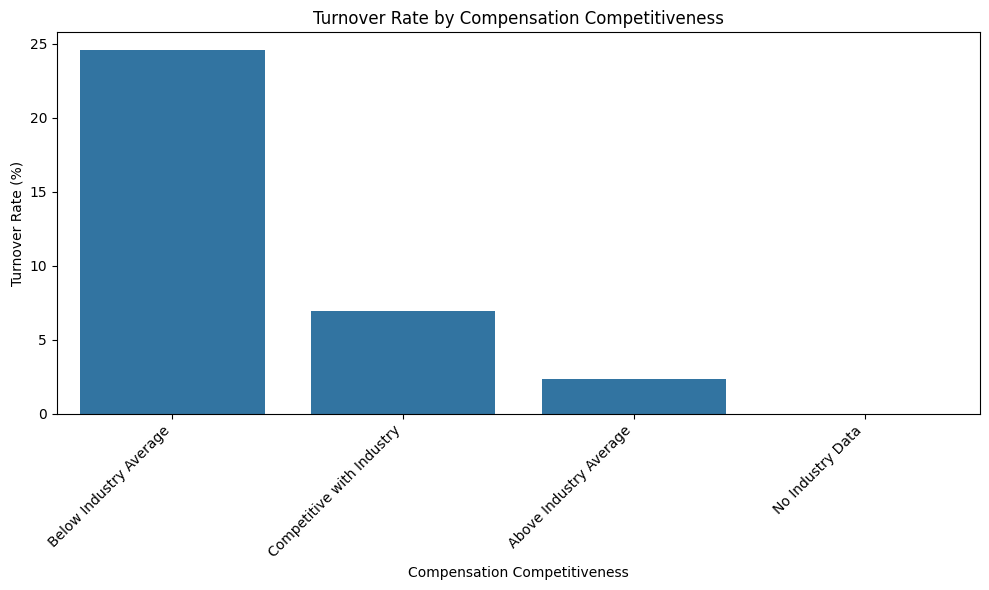

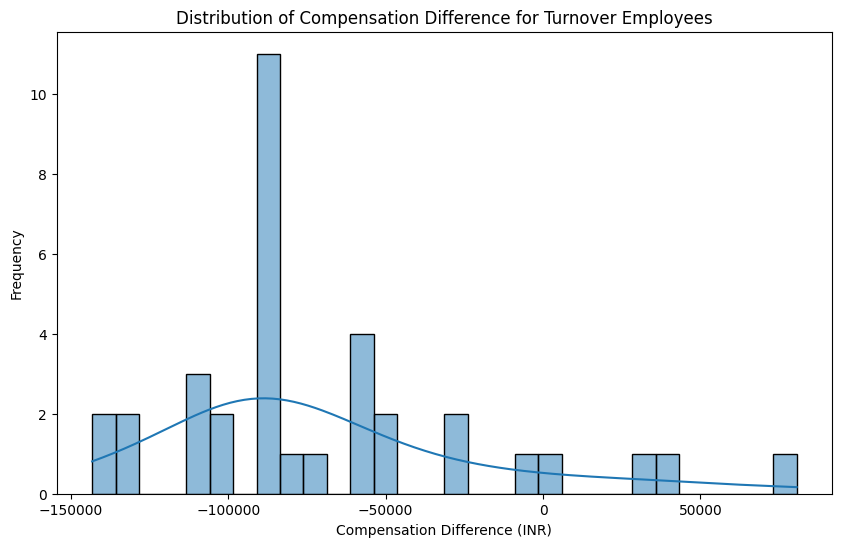

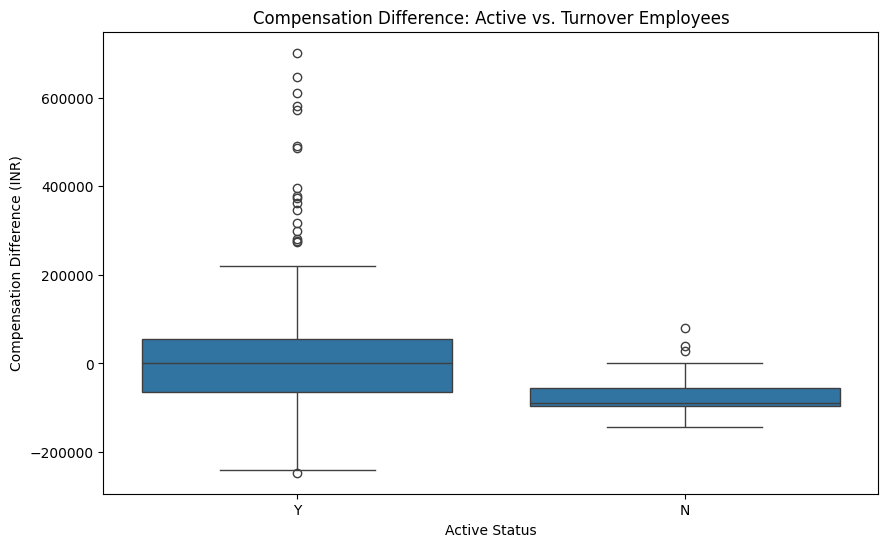

In [75]:
# prompt: write a code to indentify is head count decline of employee is due to the compensation difference

# Now, link compensation competitiveness to turnover
# We need the 'Active?' status from the original or merged dataframe.
# The merged_df contains the 'Active?' column as it's a left merge from df_employee_data.

# Filter for employees who have turned over ('Active?' is 'N' or similar)
# Assuming 'Active?' column is cleaned and 'N' indicates turnover.
turnover_status = 'N' # Or whatever 'Active?' value indicates turnover

# Calculate turnover rate by Compensation Competitiveness category
# First, count total employees in each category
total_by_comp_category = merged_df['Compensation Competitiveness'].value_counts().rename('Total Employees')

# Then, count turnover employees in each category
turnover_by_comp_category = merged_df[merged_df['Active?'] == turnover_status]['Compensation Competitiveness'].value_counts().rename('Turnover Employees')

# Combine the counts
comp_turnover_summary = pd.concat([total_by_comp_category, turnover_by_comp_category], axis=1)

# Fill NaN values with 0 for categories with no turnover
comp_turnover_summary['Turnover Employees'].fillna(0, inplace=True)
comp_turnover_summary['Turnover Employees'] = comp_turnover_summary['Turnover Employees'].astype(int)

# Calculate the Turnover Rate by Compensation Competitiveness category
comp_turnover_summary['Turnover Rate (%)'] = (comp_turnover_summary['Turnover Employees'] / comp_turnover_summary['Total Employees']) * 100

print("\nTurnover Rate by Compensation Competitiveness Category:")
print(comp_turnover_summary.sort_values(by='Turnover Rate (%)', ascending=False))

# Visualize the turnover rate by compensation category
if not comp_turnover_summary.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=comp_turnover_summary.index, y=comp_turnover_summary['Turnover Rate (%)'])
    plt.title('Turnover Rate by Compensation Competitiveness')
    plt.xlabel('Compensation Competitiveness')
    plt.ylabel('Turnover Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # You could also look at the distribution of compensation difference specifically for turnover employees
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[merged_df['Active?'] == turnover_status]['Compensation Difference (INR)'].dropna(), bins=30, kde=True)
    plt.title('Distribution of Compensation Difference for Turnover Employees')
    plt.xlabel('Compensation Difference (INR)')
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot of compensation difference comparing active vs turnover employees
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Active?', y='Compensation Difference (INR)', data=merged_df.dropna(subset=['Compensation Difference (INR)']))
    plt.title('Compensation Difference: Active vs. Turnover Employees')
    plt.xlabel('Active Status')
    plt.ylabel('Compensation Difference (INR)')
    plt.show()


else:
    print("Could not calculate turnover rate by compensation competitiveness.")

# Further analysis could involve statistical tests (e.g., ANOVA or t-test) to see if the mean compensation difference
# is significantly different between active and turnover groups.

# Example: T-test (comparing 'Below Industry Average' group turnover rate to others)
# Requires scipy
# try:
#     from scipy import stats
#     below_industry_turnover_rates = merged_df[merged_df['Compensation Competitiveness'] == 'Below Industry Average']['Active?'].apply(lambda x: 1 if x == turnover_status else 0)
#     other_turnover_rates = merged_df[merged_df['Compensation Competitiveness'] != 'Below Industry Average']['Active?'].apply(lambda x: 1 if x == turnover_status else 0)

#     if len(below_industry_turnover_rates) > 1 and len(other_turnover_rates) > 1: # Ensure enough data points
#         ttest_result = stats.ttest_ind(below_industry_turnover_rates, other_turnover_rates, nan_policy='omit')
#         print("\nT-test comparing turnover rates: 'Below Industry Average' vs. 'Others'")
#         print(f"T-statistic: {ttest_result.statistic:.4f}, P-value: {ttest_result.pvalue:.4f}")
#         if ttest_result.pvalue < 0.05:
#             print("The difference in turnover rate is statistically significant (p < 0.05).")
#         else:
#              print("The difference in turnover rate is not statistically significant (p >= 0.05).")
#     else:
#         print("\nNot enough data points in groups to perform T-test.")
# except ImportError:
#     print("\nScipy not installed. Cannot perform T-test.")
#     print("Install with: !pip install scipy")



In [76]:
# prompt: Make recommendations basis the dataset that will help the firm retain more employees

print("\n--- Recommendations for Employee Retention ---")

# Summarize key findings from previous analysis to support recommendations

# 1. Locations with High Turnover
if 'turnover_summary_sorted' in locals() and not turnover_summary_sorted.empty:
    print("\nFinding: Turnover Rate by Location")
    print(turnover_summary_sorted)
    if not locations_with_highest_rate.empty:
         highest_location = locations_with_highest_rate.index[0]
         print(f"\nRecommendation: Investigate the specific reasons for high turnover in locations like '{highest_location}'. This could involve exit interviews, surveys, or discussions with managers and employees in these areas. Potential factors could include local market conditions, management practices, or specific site-related issues.")

# 2. Compensation Competitiveness and Turnover
if 'comp_turnover_summary' in locals() and not comp_turnover_summary.empty:
    print("\nFinding: Turnover Rate by Compensation Competitiveness")
    print(comp_turnover_summary.sort_values(by='Turnover Rate (%)', ascending=False))
    # Identify if "Below Industry Average" has a notably higher turnover rate
    if 'Below Industry Average' in comp_turnover_summary.index:
        below_industry_rate = comp_turnover_summary.loc['Below Industry Average', 'Turnover Rate (%)']
        # Compare this rate to the overall average or other categories
        average_rate = comp_turnover_summary['Turnover Rate (%)'].mean() # Simple average, could use weighted average
        if below_industry_rate > average_rate * 1.2: # Heuristic: more than 20% higher than average
             print("\nRecommendation: Review compensation for employees categorized as 'Below Industry Average'. Consider market adjustments, especially for critical roles and locations identified in previous steps. Ensuring competitive compensation is a fundamental step in retaining talent.")

    # Look at roles/locations with a high percentage of 'Below Industry Average' compensation
    if 'merged_df' in locals() and not merged_df.empty:
        below_comp_roles_locations = merged_df[merged_df['Compensation Competitiveness'] == 'Below Industry Average'].groupby(['Role', 'Location']).size().reset_index(name='Count')
        if not below_comp_roles_locations.empty:
            print("\nRoles and Locations with Employees Likely Below Industry Compensation:")
            print(below_comp_roles_locations.sort_values(by='Count', ascending=False).head())
            print("\nRecommendation: Prioritize compensation reviews for roles and locations identified as having a significant number of employees paid below industry average. This targeted approach can be more cost-effective than broad compensation increases.")


# General Recommendations based on common retention factors (not explicitly found in *this* dataset, but good practice)
print("\nGeneral Recommendations (based on common HR best practices, assuming relevance):")

print("- Conduct Exit Interviews: Systematically capture reasons for departure to get direct feedback from employees who are leaving.")
print("- Improve Employee Engagement: Regularly survey employees to understand satisfaction levels with work environment, management, and opportunities for growth.")
print("- Provide Development Opportunities: Offer training, mentorship, and career progression paths to keep employees engaged and invested in their future with the company.")
print("- Enhance Manager Training: Equip managers with skills to effectively lead teams, provide feedback, and support employee development, as managerial relationships are a key factor in retention.")
print("- Foster a Positive Work Culture: Promote a supportive and inclusive environment where employees feel valued and connected.")
print("- Recognize and Reward Performance: Implement effective recognition programs to acknowledge employee contributions.")

print("\n--- Next Steps ---")
print("- Deep dive into the specific reasons for turnover in high-turnover locations.")
print("- Conduct a detailed compensation analysis for roles and locations identified as potentially underpaid relative to the market.")
print("- Implement targeted HR initiatives based on the findings (e.g., compensation adjustments, management training, employee engagement programs).")
print("- Continuously monitor turnover rates and key metrics to assess the impact of retention efforts.")




--- Recommendations for Employee Retention ---

Finding: Turnover Rate by Location
           Total Employees  Turnover Employees  Turnover Rate (%)
Location                                                         
Bangalore              150                  25          16.666667
Pune                    45                   7          15.555556
Jaipur                 105                   3           2.857143

Recommendation: Investigate the specific reasons for high turnover in locations like 'Bangalore'. This could involve exit interviews, surveys, or discussions with managers and employees in these areas. Potential factors could include local market conditions, management practices, or specific site-related issues.

Finding: Turnover Rate by Compensation Competitiveness
                              Total Employees  Turnover Employees  \
Compensation Competitiveness                                        
Below Industry Average                    106                  26   
Competit

In [77]:
# prompt: write code to print Roles and Locations with Employees Likely Below Industry Compensation

if 'merged_df' in locals() and not merged_df.empty:
  below_comp_roles_locations = merged_df[merged_df['Compensation Competitiveness'] == 'Below Industry Average'].groupby(['Role', 'Location']).size().reset_index(name='Count')
  if not below_comp_roles_locations.empty:
    print("\nRoles and Locations with Employees Likely Below Industry Compensation:")
    print(below_comp_roles_locations.sort_values(by='Count', ascending=False))
  else:
    print("\nNo employees found categorized as 'Below Industry Average' compensation.")
else:
  print("\nMerged DataFrame not available to identify roles and locations with below industry compensation.")


Roles and Locations with Employees Likely Below Industry Compensation:
             Role  Location  Count
0         Analyst  Banglore     38
5  Senior Analyst  Banglore     29
1         Analyst      Pune     12
2       Associate  Banglore      8
3       Associate    Jaipur      8
4       Associate      Pune      6
7  Senior Analyst      Pune      4
6  Senior Analyst    Jaipur      1


In [78]:
# prompt: The leadership wants to incorporate either Bonuses or Stock Units to the compensation of senior resources (Senior Associate and Manager) wants to understand the impact on Financials( note total current revenue of company is 600,000,000 INR)

# Total company revenue
total_company_revenue = 600_000_000  # INR

# Filter for senior resources (Senior Associate and Manager) and active employees
senior_active_employees = df[(df['Role'].isin(['Senior Associate', 'Manager'])) & (df['Active?'] == 'Y')].copy()

print("\nActive Senior Resources:")
display(senior_active_employees.head())
print(f"Number of active senior resources: {len(senior_active_employees)}")

# Calculate the total current compensation for active senior resources
total_current_senior_comp = senior_active_employees['Current Comp (INR)'].sum()
print(f"\nTotal current compensation for active senior resources: {total_current_senior_comp:,.2f} INR")

# Define potential bonus/stock unit scenarios (as a percentage of current compensation)
# Scenario 1: 5% of current comp as bonus/stock
bonus_percentage_scenario1 = 0.05
# Scenario 2: 10% of current comp as bonus/stock
bonus_percentage_scenario2 = 0.10

# Calculate the cost of each scenario
cost_scenario1 = total_current_senior_comp * bonus_percentage_scenario1
cost_scenario2 = total_current_senior_comp * bonus_percentage_scenario2

print(f"\nEstimated cost for Scenario 1 ({bonus_percentage_scenario1*100}% bonus/stock): {cost_scenario1:,.2f} INR")
print(f"Estimated cost for Scenario 2 ({bonus_percentage_scenario2*100}% bonus/stock): {cost_scenario2:,.2f} INR")

# Calculate the financial impact as a percentage of total company revenue
impact_scenario1_percentage = (cost_scenario1 / total_company_revenue) * 100
impact_scenario2_percentage = (cost_scenario2 / total_company_revenue) * 100

print(f"\nFinancial impact as % of total revenue for Scenario 1: {impact_scenario1_percentage:.4f}%")
print(f"Financial impact as % of total revenue for Scenario 2: {impact_scenario2_percentage:.4f}%")

# Summarize the findings and their implications
print("\n--- Financial Impact Analysis for Senior Resources Compensation Adjustment ---")
print(f"Total Company Revenue: {total_company_revenue:,.2f} INR")
print(f"Total Current Compensation for Active Senior Associates and Managers: {total_current_senior_comp:,.2f} INR")
print(f"Number of Active Senior Associates and Managers: {len(senior_active_employees)}")

print(f"\nScenario 1: Bonus/Stock Units equivalent to {bonus_percentage_scenario1*100}% of current compensation")
print(f"- Estimated Additional Compensation Cost: {cost_scenario1:,.2f} INR")
print(f"- Financial Impact (as % of Total Revenue): {impact_scenario1_percentage:.4f}%")

print(f"\nScenario 2: Bonus/Stock Units equivalent to {bonus_percentage_scenario2*100}% of current compensation")
print(f"- Estimated Additional Compensation Cost: {cost_scenario2:,.2f} INR")
print(f"- Financial Impact (as % of Total Revenue): {impact_scenario2_percentage:.4f}%")

print("\n--- Implications ---")
print(f"- Scenario 1 (5%): Represents a cost of approximately {impact_scenario1_percentage:.4f}% of the company's total revenue.")
print(f"- Scenario 2 (10%): Represents a cost of approximately {impact_scenario2_percentage:.4f}% of the company's total revenue.")
print("- These costs are calculated based *only* on the current compensation of existing active senior resources.")
print("- This analysis does not account for:")
print("  - The potential positive impact on senior resource retention (reducing recruitment/training costs).")
print("  - The specific financial/tax implications of bonuses vs. stock units.")
print("  - Potential future hires or compensation adjustments.")
print("  - The impact on employee morale and productivity.")

print("\nRecommendation:")
print("Review these financial impacts in the context of the desired retention benefits and overall compensation strategy. Consider which scenario is more feasible given the company's financial health and strategic priorities.")
print("Further analysis could involve projecting the long-term cost and ROI of improved retention.")



Active Senior Resources:


,Name,Role,Location,Years of Experience,Active?,Current Comp (INR),Last Working Day,L3Q Average Self Rating,L3Q Average Manager Rating
13,Jai Menon,Senior Associate,Pune,6-7,Y,1704253.000,Na,4.0,4.0
18,Devi Menon,Senior Associate,Jaipur,1-2,Y,1714061.250,Na,4.0,4.0
27,Renu Gupta,Senior Associate,Bangalore,5-6,Y,2291090.000,Na,4.0,4.0
51,Deepali Joshi,Senior Associate,Jaipur,2-3,Y,1324501.875,Na,4.0,4.0
56,Reena Dhillon,Senior Associate,Bangalore,5-6,Y,2452003.000,Na,5.0,5.0


Number of active senior resources: 28

Total current compensation for active senior resources: 58,984,525.88 INR

Estimated cost for Scenario 1 (5.0% bonus/stock): 2,949,226.29 INR
Estimated cost for Scenario 2 (10.0% bonus/stock): 5,898,452.59 INR

Financial impact as % of total revenue for Scenario 1: 0.4915%
Financial impact as % of total revenue for Scenario 2: 0.9831%

--- Financial Impact Analysis for Senior Resources Compensation Adjustment ---
Total Company Revenue: 600,000,000.00 INR
Total Current Compensation for Active Senior Associates and Managers: 58,984,525.88 INR
Number of Active Senior Associates and Managers: 28

Scenario 1: Bonus/Stock Units equivalent to 5.0% of current compensation
- Estimated Additional Compensation Cost: 2,949,226.29 INR
- Financial Impact (as % of Total Revenue): 0.4915%

Scenario 2: Bonus/Stock Units equivalent to 10.0% of current compensation
- Estimated Additional Compensation Cost: 5,898,452.59 INR
- Financial Impact (as % of Total Revenue):

In [96]:
# prompt: write a code to export CSV

# Export the processed DataFrame to a CSV file
output_filename = 'processed_employee_data.csv'
df.to_csv(output_filename, index=False)

print(f"\nDataFrame successfully exported to '{output_filename}'")

# You can then download the file from Colab's file browser or using the files module
from google.colab import files
files.download(output_filename)


DataFrame successfully exported to 'processed_employee_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# prompt: User Story 1: Filter and Display Active Employees by Role
# 	As a user, I should be able to:
# 	Filter employees by Role
# 	Select a Location and view the average compensation for that location
# 	View a bar chart comparing compensation across all locations
# 	Toggle to include/exclude Inactive employees
# 	View: Name, Role, Location, and Compensation

import ipywidgets as widgets
from IPython.display import display, clear_output

# Assume 'df' is your DataFrame loaded and processed from the previous steps
# Ensure 'df' exists and has the necessary columns: 'Name', 'Role', 'Location', 'Current Comp (INR)', 'Active?'

if 'df' in locals() and not df.empty:

    # Drop rows with missing 'Current Comp (INR)' for average calculation
    df_cleaned_comp = df.dropna(subset=['Current Comp (INR)']).copy()

    # --- Create Widgets ---

    # Role Filter Dropdown
    roles = ['All'] + sorted(df['Role'].unique().tolist())
    role_dropdown = widgets.Dropdown(
        options=roles,
        value='All',
        description='Filter by Role:',
        disabled=False,
    )

    # Location Selector for Average Compensation
    locations = sorted(df_cleaned_comp['Location'].unique().tolist())
    location_dropdown = widgets.Dropdown(
        options=locations,
        description='Select Location (Avg Comp):',
        disabled=False,
    )

    # Active Employee Toggle
    active_toggle = widgets.Checkbox(
        value=True,
        description='Include Active Employees',
        disabled=False,
        indent=False
    )

    # Inactive Employee Toggle
    inactive_toggle = widgets.Checkbox(
        value=False,
        description='Include Inactive Employees',
        disabled=False,
        indent=False
    )

    # Output areas
    output_data = widgets.Output()
    output_avg_comp = widgets.Output()
    output_chart = widgets.Output()


    # --- Define Filtering and Display Logic ---

    def update_display(change):
        with output_data:
            clear_output(wait=True)
            filtered_df = df.copy()

            # Apply Active/Inactive filter
            active_status_filter = []
            if active_toggle.value:
                active_status_filter.append('Y') # Assuming 'Y' for Active
            if inactive_toggle.value:
                active_status_filter.append('N') # Assuming 'N' for Inactive

            if active_status_filter: # Apply filter only if at least one toggle is selected
                filtered_df = filtered_df[filtered_df['Active?'].isin(active_status_filter)]
            else: # If neither is selected, show nothing or an empty state
                print("Please select at least 'Include Active Employees' or 'Include Inactive Employees'.")
                display(pd.DataFrame(columns=['Name', 'Role', 'Location', 'Current Comp (INR)', 'Active?'])) # Display empty df
                return


            # Apply Role filter
            selected_role = role_dropdown.value
            if selected_role != 'All':
                filtered_df = filtered_df[filtered_df['Role'] == selected_role]

            # Select and display required columns
            display_cols = ['Name', 'Role', 'Location', 'Current Comp (INR)', 'Active?']
            # Ensure all display columns exist in the DataFrame
            display_cols = [col for col in display_cols if col in filtered_df.columns]

            print(f"\nFiltered Employees (Role: {selected_role}, Active Status: {active_status_filter}):")
            if filtered_df.empty:
                print("No employees match the current filters.")
                display(pd.DataFrame(columns=display_cols)) # Display empty df with expected columns
            else:
                 display(filtered_df[display_cols])

    def update_avg_comp(change):
         with output_avg_comp:
            clear_output(wait=True)
            selected_location = location_dropdown.value

            # Filter for the selected location and include based on active/inactive toggle
            location_df = df_cleaned_comp.copy() # Use the dataframe cleaned for comp
            active_status_filter = []
            if active_toggle.value:
                active_status_filter.append('Y')
            if inactive_toggle.value:
                active_status_filter.append('N')

            if active_status_filter:
                 location_df = location_df[location_df['Active?'].isin(active_status_filter)]
            else:
                 print("Select active status to calculate average compensation.")
                 return # Cannot calculate avg without active status filter

            location_df = location_df[location_df['Location'] == selected_location]


            if not location_df.empty:
                average_comp = location_df['Current Comp (INR)'].mean()
                print(f"\nAverage Compensation for {selected_location} (Including Active Status: {active_status_filter}): {average_comp:,.2f} INR")
            else:
                print(f"\nNo employees found for {selected_location} with the selected active status to calculate average compensation.")


    def update_chart(change):
        with output_chart:
            clear_output(wait=True)

            # Calculate average compensation by location, considering active status filter
            chart_df = df_cleaned_comp.copy()
            active_status_filter = []
            if active_toggle.value:
                active_status_filter.append('Y')
            if inactive_toggle.value:
                active_status_filter.append('N')

            if active_status_filter:
                 chart_df = chart_df[chart_df['Active?'].isin(active_status_filter)]
                 if chart_df.empty:
                     print("\nNo data to plot the compensation comparison chart with the selected active status.")
                     return
            else:
                 print("\nSelect active status to plot the compensation comparison chart.")
                 return # Cannot plot without active status filter


            avg_comp_by_location = chart_df.groupby('Location')['Current Comp (INR)'].mean().sort_values(ascending=False)

            if not avg_comp_by_location.empty:
                plt.figure(figsize=(12, 6))
                sns.barplot(x=avg_comp_by_location.index, y=avg_comp_by_location.values)
                plt.title(f'Average Compensation by Location (Including Active Status: {active_status_filter})')
                plt.xlabel('Location')
                plt.ylabel('Average Compensation (INR)')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                print("\nNo data to plot the compensation comparison chart for the selected active status.")


    # --- Link Widgets to Update Functions ---

    # Link widgets that trigger data display update
    role_dropdown.observe(update_display, names='value')
    active_toggle.observe(update_display, names='value')
    inactive_toggle.observe(update_display, names='value')

    # Link widgets that trigger average comp update
    location_dropdown.observe(update_avg_comp, names='value')
    active_toggle.observe(update_avg_comp, names='value')
    inactive_toggle.observe(update_avg_comp, names='value')


    # Link widgets that trigger chart update
    active_toggle.observe(update_chart, names='value')
    inactive_toggle.observe(update_chart, names='value')


    # --- Initial Display ---
    print("Select filters to view employee data and compensation analysis:")
    display(role_dropdown, active_toggle, inactive_toggle, location_dropdown)
    display(output_data, output_avg_comp, output_chart)


    # Trigger initial updates
    update_display(None)
    update_avg_comp(None)
    update_chart(None)

else:
    print("DataFrame 'df' not found or is empty. Please run the data loading and processing steps first.")

Select filters to view employee data and compensation analysis:


Dropdown(description='Filter by Role:', options=('All', 'Analyst', 'Associate', 'Manager', 'Senior Analyst', '…

Checkbox(value=True, description='Include Active Employees', indent=False)

Checkbox(value=False, description='Include Inactive Employees', indent=False)

Dropdown(description='Select Location (Avg Comp):', options=('Banglore', 'Jaipur', 'Pune'), value='Banglore')

Output()

Output()

Output()

<ipython-input-119-96f4235eed48>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(0, inplace=True)
<ipython-input-119-96f4235eed48>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_location_count = df.groupby(['Experience_Range', 'Location']).size().unstack(fill_value=0)
<ipython-input-119-96f


--- User Story 2: Employee Count by Years of Experience Range ---
Experience_Range
0-1      300
1-2        0
2-5        0
5-10       0
10-20      0
20+        0
Name: count, dtype: int64

--- Grouped by Experience Range and Location ---
Location          Banglore  Jaipur  Pune
Experience_Range                        
0-1                    150     105    45
1-2                      0       0     0
2-5                      0       0     0
5-10                     0       0     0
10-20                    0       0     0
20+                      0       0     0

--- Grouped by Experience Range and Role ---
Role              Analyst  Associate  Manager  Senior Analyst  \
Experience_Range                                                
0-1                   151         46        6              75   
1-2                     0          0        0               0   
2-5                     0          0        0               0   
5-10                    0          0        0               0  

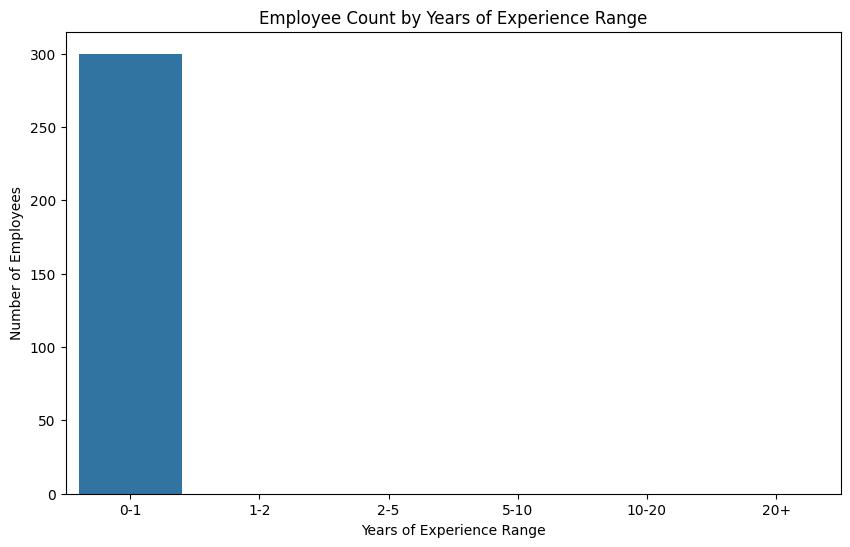

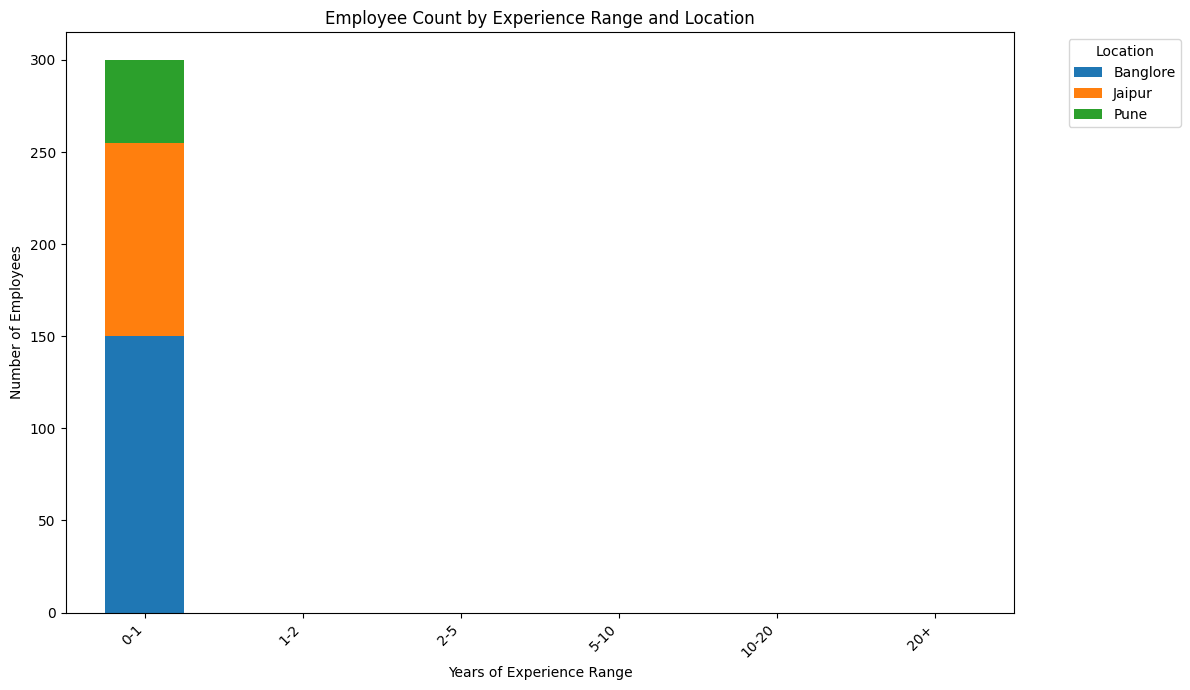


--- User Story 3: Simulate Compensation Increments ---
Configure compensation increment simulation:


FloatText(value=5.0, description='Global % Increment:')

Textarea(value='', description='Custom Increments:', layout=Layout(height='100px', width='80%'), placeholder='…

Button(button_style='success', description='Run Simulation', icon='run', style=ButtonStyle(), tooltip='Click t…

Output()

In [119]:
# prompt: User Story 2: Group Employees by Years of Experience
# 	As a user, I should be able to:
# 	View a count of employees in experience ranges (e.g., 0–1, 1–2, 2–5, etc.)
# 	Optionally group breakdown by Location or Role
# 	User Story 3: Simulate Compensation Increments
# 	As a user, I should be able to:
# 	Input a global fixed % increment
# 	See updated compensation alongside the current compensation
# 	Bonus: Apply custom % increments per Employee or per Location

# --- User Story 2: Group Employees by Years of Experience ---

# Define the experience ranges
experience_bins = [0, 1, 2, 5, 10, 20, float('inf')] # Define the upper bounds (exclusive)
experience_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20+']

# Ensure 'Years of Experience' is numeric, coercing errors to NaN
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

# Handle potential NaN values introduced by coercion or remaining from previous steps
# Option 1: Fill NaN with a value (e.g., 0 or median/mean, depending on context)
# For experience ranges, filling with 0 might be appropriate if NaN implies very low or no experience.
df['Years of Experience'].fillna(0, inplace=True)

# Option 2: Drop rows with NaN in 'Years of Experience' if they are few and not critical
# df.dropna(subset=['Years of Experience'], inplace=True)


# Create a new column 'Experience_Range' based on 'Years of Experience'
df['Experience_Range'] = pd.cut(df['Years of Experience'], bins=experience_bins, labels=experience_labels, right=False)

# Group by 'Experience_Range' and count employees
experience_count = df['Experience_Range'].value_counts().sort_index()

print("\n--- User Story 2: Employee Count by Years of Experience Range ---")
print(experience_count)

# Optionally group by Location or Role
print("\n--- Grouped by Experience Range and Location ---")
experience_location_count = df.groupby(['Experience_Range', 'Location']).size().unstack(fill_value=0)
print(experience_location_count)

print("\n--- Grouped by Experience Range and Role ---")
experience_role_count = df.groupby(['Experience_Range', 'Role']).size().unstack(fill_value=0)
print(experience_role_count)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Experience_Range', data=df, order=experience_labels)
plt.title('Employee Count by Years of Experience Range')
plt.xlabel('Years of Experience Range')
plt.ylabel('Number of Employees')
plt.show()

# Visualize grouped data (example for Location)
experience_location_count.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Employee Count by Experience Range and Location')
plt.xlabel('Years of Experience Range')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- User Story 3: Simulate Compensation Increments ---

print("\n--- User Story 3: Simulate Compensation Increments ---")

# Create a copy of the DataFrame to simulate increments without altering the original data
df_simulated_comp = df.copy()

# Input widget for global fixed % increment
global_increment_percentage_widget = widgets.FloatText(
    value=5.0, # Default 5%
    description='Global % Increment:',
    disabled=False
)

# Bonus: Input widget for custom increments per Role or Location (optional)
# We can create a simple text area to input custom increments in a specific format
custom_increments_widget = widgets.Textarea(
    value='',
    placeholder='Enter custom increments per Role or Location (e.g., Role:Manager:10, Location:Bangalore:7)',
    description='Custom Increments:',
    disabled=False,
    layout=widgets.Layout(width='80%', height='100px')
)

# Button to trigger simulation
simulate_button = widgets.Button(
    description='Run Simulation',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to simulate compensation increments',
    icon='run' # (FontAwesome names)
)

# Output area for simulation results
simulation_output = widgets.Output()

# --- Define Simulation Logic ---

def run_simulation(b):
    with simulation_output:
        clear_output(wait=True)
        print("Running simulation...")

        # Get the global increment percentage
        global_increment_pct = global_increment_percentage_widget.value / 100.0

        # Create a copy of the DataFrame for this simulation run
        current_sim_df = df.copy() # Use df which now has Experience_Range

        # Apply global increment first
        current_sim_df['Simulated Comp (INR)'] = current_sim_df['Current Comp (INR)'] * (1 + global_increment_pct)

        # Apply custom increments (optional)
        custom_increments_text = custom_increments_widget.value.strip()
        custom_rules = {} # {('Role', 'Manager'): 0.10, ('Location', 'Bangalore'): 0.07}

        if custom_increments_text:
            try:
                rules = custom_increments_text.split(',')
                for rule in rules:
                    parts = rule.strip().split(':')
                    if len(parts) == 3:
                        category_type = parts[0].strip() # e.g., 'Role', 'Location'
                        category_value = parts[1].strip() # e.g., 'Manager', 'Bangalore'
                        increment_pct = float(parts[2].strip()) / 100.0
                        if category_type in ['Role', 'Location']:
                            custom_rules[(category_type, category_value)] = increment_pct
                        else:
                             print(f"Warning: Invalid category type in custom rule: {rule}. Must be 'Role' or 'Location'.")
                    else:
                        print(f"Warning: Invalid custom rule format: {rule}. Expected format 'Type:Value:%'.")
            except ValueError:
                print("Error: Invalid number format in custom increments.")
            except Exception as e:
                print(f"An error occurred parsing custom increments: {e}")

        # Apply custom increments, overriding global increment where applicable
        if custom_rules:
             for index, row in current_sim_df.iterrows():
                 applied_increment_pct = global_increment_pct # Start with global
                 # Check for custom rule by Role
                 if ('Role', row['Role']) in custom_rules:
                     applied_increment_pct = custom_rules[('Role', row['Role'])]
                 # Check for custom rule by Location (Location overrides Role if both apply, or vice-versa, define priority)
                 # Here, let's make Location override Role for simplicity, or apply the highest if multiple rules match
                 if ('Location', row['Location']) in custom_rules:
                     applied_increment_pct = custom_rules[('Location', row['Location'])] # Location overrides

                 # Re-calculate simulated comp with the determined increment
                 current_sim_df.loc[index, 'Simulated Comp (INR)'] = row['Current Comp (INR)'] * (1 + applied_increment_pct)


        # Calculate the absolute difference
        current_sim_df['Comp Increment Amount (INR)'] = current_sim_df['Simulated Comp (INR)'] - current_sim_df['Current Comp (INR)']

        # Display the results
        print("\nSimulation Results (showing first 10 employees):")
        display_cols = ['Name', 'Role', 'Location', 'Current Comp (INR)', 'Simulated Comp (INR)', 'Comp Increment Amount (INR)']
        # Ensure all display columns exist
        display_cols = [col for col in display_cols if col in current_sim_df.columns]
        display(current_sim_df[display_cols].head(10))

        # Display total cost of increment
        total_increment_cost = current_sim_df['Comp Increment Amount (INR)'].sum()
        print(f"\nTotal Estimated Annual Increment Cost: {total_increment_cost:,.2f} INR")

        # Calculate total simulated compensation
        total_simulated_comp = current_sim_df['Simulated Comp (INR)'].sum()
        print(f"Total Estimated Annual Simulated Compensation: {total_simulated_comp:,.2f} INR")

        # Optional: Visualize the distribution of increments
        plt.figure(figsize=(10, 6))
        sns.histplot(current_sim_df['Comp Increment Amount (INR)'], bins=30, kde=True)
        plt.title('Distribution of Compensation Increment Amount')
        plt.xlabel('Increment Amount (INR)')
        plt.ylabel('Frequency')
        plt.show()


# Link the button to the simulation function
simulate_button.on_click(run_simulation)

# Display the simulation widgets
print("Configure compensation increment simulation:")
display(global_increment_percentage_widget, custom_increments_widget, simulate_button, simulation_output)

In [120]:
# prompt: User Story 4: Download Filtered Employee Data
# 	As a user, I should be able to:
# 	Export filtered employee data to a CSV file
# 	CSV should include: Name, Role, Location, Experience, Compensation, Status
# 	Reflect any applied incremented values

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assume df is already loaded and processed as per the preceding code
# Ensure 'df' is available and contains the necessary columns.

# --- User Story 4: Download Filtered Employee Data ---

print("\n--- User Story 4: Download Filtered Employee Data ---")

# Create a copy of the DataFrame to work with, including potentially simulated data if available
# Check if 'Simulated Comp (INR)' exists from User Story 3
if 'Simulated Comp (INR)' in df.columns:
    download_df = df.copy()
    # Use the simulated comp if available and preferred, or keep 'Current Comp (INR)'
    # For this story, the requirement is "Reflect any applied incremented values".
    # So we should include the 'Simulated Comp (INR)' if the simulation was run.
    # Let's assume if the simulation was run, the user wants the simulated data.
    # If not, we'll just use the 'Current Comp (INR)'.

    # Let's also add a column indicating the status (Active? or Inactive based on Last Working Day)
    # Assuming 'Y' means Active and 'N' means Inactive in the 'Active?' column
    download_df['Status'] = download_df['Active?'].apply(lambda x: 'Active' if x == 'Y' else ('Inactive' if x == 'N' else 'Unknown'))

    # Define the columns for the CSV export
    export_cols = ['Name', 'Role', 'Location', 'Years of Experience', 'Simulated Comp (INR)', 'Status']

    # Rename the 'Simulated Comp (INR)' column to 'Compensation' for the export
    export_df = download_df[export_cols].rename(columns={'Simulated Comp (INR)': 'Compensation', 'Years of Experience': 'Experience'})

else:
    # If simulation was not run, export current data
    print("Simulated compensation data not found. Exporting 'Current Comp (INR)'.")
    download_df = df.copy()
     # Let's also add a column indicating the status (Active? or Inactive based on Last Working Day)
    # Assuming 'Y' means Active and 'N' means Inactive in the 'Active?' column
    download_df['Status'] = download_df['Active?'].apply(lambda x: 'Active' if x == 'Y' else ('Inactive' if x == 'N' else 'Unknown'))


    # Define the columns for the CSV export using 'Current Comp (INR)'
    export_cols = ['Name', 'Role', 'Location', 'Years of Experience', 'Current Comp (INR)', 'Status']

    # Rename columns for the export
    export_df = download_df[export_cols].rename(columns={'Current Comp (INR)': 'Compensation', 'Years of Experience': 'Experience'})

# --- Create Filtering Widgets for Download ---

# Role Filter Dropdown
roles = ['All'] + sorted(df['Role'].unique().tolist())
download_role_dropdown = widgets.Dropdown(
    options=roles,
    value='All',
    description='Filter Role:',
    disabled=False,
)

# Location Filter Dropdown
locations = ['All'] + sorted(df['Location'].unique().tolist())
download_location_dropdown = widgets.Dropdown(
    options=locations,
    value='All',
    description='Filter Location:',
    disabled=False,
)

# Status Filter Dropdown (Active, Inactive, All)
statuses = ['All'] + sorted(export_df['Status'].unique().tolist())
download_status_dropdown = widgets.Dropdown(
    options=statuses,
    value='All',
    description='Filter Status:',
    disabled=False,
)

# Button to trigger download
download_button = widgets.Button(
    description='Download Filtered CSV',
    disabled=False,
    button_style='info',
    tooltip='Click to download filtered data as CSV',
    icon='download'
)

# Output area for download confirmation
download_output = widgets.Output()

# --- Define Download Logic ---

def download_filtered_data(b):
    with download_output:
        clear_output(wait=True)
        print("Applying filters and generating CSV...")

        filtered_export_df = export_df.copy()

        # Apply Role filter
        selected_role = download_role_dropdown.value
        if selected_role != 'All':
            filtered_export_df = filtered_export_df[filtered_export_df['Role'] == selected_role]

        # Apply Location filter
        selected_location = download_location_dropdown.value
        if selected_location != 'All':
            filtered_export_df = filtered_export_df[filtered_export_df['Location'] == selected_location]

        # Apply Status filter
        selected_status = download_status_dropdown.value
        if selected_status != 'All':
            filtered_export_df = filtered_export_df[filtered_export_df['Status'] == selected_status]

        if filtered_export_df.empty:
            print("No data matches the selected filters.")
        else:
            # Define filename
            output_filename = 'filtered_employee_data.csv'

            # Export to CSV
            filtered_export_df.to_csv(output_filename, index=False)

            print(f"Filtered data successfully exported to '{output_filename}'. Downloading...")

            # Trigger file download
            files.download(output_filename)
            print("Download initiated.")


# Link the button to the download function
download_button.on_click(download_filtered_data)

# Display the download widgets
print("Select filters for the data you want to download:")
display(download_role_dropdown, download_location_dropdown, download_status_dropdown, download_button, download_output)

# Note: The download will be triggered in your browser.
# The output cell will show messages like "Filtering data..." and "Download initiated."
# The actual file download prompt is handled by your browser.


--- User Story 4: Download Filtered Employee Data ---
Simulated compensation data not found. Exporting 'Current Comp (INR)'.
Select filters for the data you want to download:


Dropdown(description='Filter Role:', options=('All', 'Analyst', 'Associate', 'Manager', 'Senior Analyst', 'Sen…

Dropdown(description='Filter Location:', options=('All', 'Banglore', 'Jaipur', 'Pune'), value='All')

Dropdown(description='Filter Status:', options=('All', 'Active', 'Inactive'), value='All')

Button(button_style='info', description='Download Filtered CSV', icon='download', style=ButtonStyle(), tooltip…

Output()